# IE7374: Group 2 Final Project Report
## *The Taxi Problem*


### Background
The main objective of our project was to use the [Taxi environment](https://www.gymlibrary.ml/environments/toy_text/taxi/) created by Gym to simulate the picking up and dropping off of passengers in the shortest number of steps using Q-Learning. The Taxi environment has 4 designated locations denoted by R, G, Y, and B, and the taxi itself may start off in any place on the 5x5 grid. It must go from its starting location to pick up the passenger and then drop off the passenger. This process denotes the length of an episode.

### The Problem & Relevancy
Although the Taxi environment is pre-set with blockers and the location of each designated location, the taxi problem itself is very relevant in the day-to-day life of our team members. As individuals without cars living in metropolitan cities, we often rely on either taxis or rideshare applications. The premise with these applications is very similar to the taxi problem where drivers are going to pick up and drop off passengers, but the taxi problem is a much smaller and much less complex environment. For the scope of this project, we have chosen to incorporate Q learning to derive calculations such as average number of steps, but an interesting expansion of this project would be to create a more complex environment that would better represent a metropolitan city.


### Code
To solve our problem, our aim was to incorporate elements of the Q-Learning algorithm as explained by [Towards Data Science](https://towardsdatascience.com/q-learning-algorithm-from-explanation-to-implementation-cdbeda2ea187). However, in incorporating the algorithm, we chose to make it into a class so we could manipulate the parameters, such as discount rate and learning rate, and effectively choose the optimal ones. In addition to Q-Learning, it was recommended to us to also incorporate SARSA - the on-policy derivative of Q-Learning. This basically means that while with Q-Learning the greedy approach is used to learn the Q-value, with SARSA, the action performed by the current policy is used to learn the Q-value. 

In [ ]:
import numpy as np
import gym
import random
from IPython.display import clear_output
from time import sleep
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [ ]:
class qlearning:

  """
  First we construct the objects of our class qlearning using an init function. 
  Some of the objects constructed below include the state size, action size, 
  learning rate, and max steps. We also construct an object called frames which 
  will later be used to depict each action within each episode as the taxi 
  moves through the grid. 
  """
  def __init__(self, state_size, action_size, learning_rate, discount_rate,
                 epsilon, decay_rate, num_episodes, max_steps, env, onoff_policy) -> None:
        self.state_size = state_size
        self.action_size = action_size
        self.qtable = np.zeros((self.state_size, self.action_size))
        self.learning_rate = learning_rate
        self.discount_rate = discount_rate
        self.epsilon = epsilon
        self.decay_rate = decay_rate
        self.num_episodes = num_episodes
        self.max_steps = max_steps
        self.env = env
        self.onoff_policy = onoff_policy
        self.frames = []
        self.reward_per_episodes = {}

  """
    One of the objects we constructed above was epsilon, or the probability of 
    exploration, and if a random number between 0 and 1 is less than epsilon 
    then the agent will explore. However, if the random number is greater 
    than epsilon, the agent will exploit.
  """
  def e_greedy(self, state):
      if random.uniform(0, 1) < self.epsilon:
        return self.env.action_space.sample()
      else:
        return np.argmax(self.qtable[state,:])

  """
    Here, we determine whether or not the class is performing Q-Learning or 
    SARSA based on whether or not the policy is on or off. 
  """

  def table_update(self, state, action, reward, next_state, next_action):
      if self.onoff_policy == 'on':
        self.qtable[state,action] = self.qtable[state,action] + self.learning_rate * (reward + self.discount_rate * self.qtable[next_state, next_action] - self.qtable[state,action])
      else:
        self.qtable[state,action] = self.qtable[state,action] + self.learning_rate * (reward + self.discount_rate * np.max(self.qtable[next_state,:]) - self.qtable[state,action])

  def train(self):
      total_reward = 0

      for e in range(self.num_episodes):
        state = self.env.reset()
        flag = False

        for s in range(self.max_steps):
          action = self.e_greedy(state)
          next_state, reward, flag, info = env.step(action)

          next_action = self.e_greedy(next_state)

          self.table_update(state, action, reward, next_state, next_action)

          state = next_state
          total_reward += reward

          self.frames.append({
              'frame': self.env.render(mode='ansi'),
              'state': state,
              'action': action,
              'reward': reward
          })
          if flag == True:
            break
        
        avg_reward = total_reward / (e+1)
        self.reward_per_episodes[e] = avg_reward
        self.epsilon = np.exp(-self.decay_rate * e)

      print('Training completed')

  """
    The taxi environment is able to render a very basic visual of the grid, 
    so we chose to visualize the taxi cab, denoted as a colored box, moving 
    through the grid. However, because it would slow down the visualization, 
    we chose to display every few steps the taxi makes.    
  """
  def show_steps(self):
      state = self.env.reset()
      flag = False
      score = 0
      
      for s in range(self.max_steps):
        print('STEP', s+1)
        action = np.argmax(self.qtable[state,:])
        next_state, reward, flag, info = env.step(action)
        score += reward
        self.env.render()
        print('STEP REWARD', reward)
        print('TOTAL SCORE', score)
        state = next_state

        if flag == True:
          break
      self.env.close()

  """
    From the graph we can see that the average reward tends to be really low 
    around -10 or around -2. Given that we know that for every move, the 
    reward is -1 and for a drop-off the reward is 20, we can assume that 
    the number of steps tends to be around 20-25. However, after around 5000 
    episodes, we see that there are a small number of episodes where the 
    rewards are around 20. We can assume this is an instance where the driver 
    was close to the passenger and the pickup was close to the drop off. 
  """
  def print_training(self):
      states = []
      actions = []
      rewards = []
      for i, frame in enumerate(self.frames):
        clear_output(wait=True)
        print(frame['frame'])
        print(f"Timestep: {i + 1}")
        print(f"State: {frame['state']}")
        states.append(frame['state'])
        print(f"Action: {frame['action']}")
        actions.append(frame['action'])
        print(f"Reward: {frame['reward']}")
        rewards.append(frame['reward'])
        sleep(.001)

        ax = plt.axes(projection='3d')
        ax.scatter3D(states, actions, rewards, 'gray')
        ax.set_xlabel('States')
        ax.set_ylabel('Actions')
        ax.set_zlabel('Rewards')
        plt.show()

  """
    From the graph we see that as the episode increases, as does the reward. 
    One interesting thing we see in the graph is that although a majority of 
    the graph tends to be smooth, the start of the graph sees spikes and 
    oscillations. This is because as the policy may be greedy it’s possible 
    that the optimal policy was selected initially and then in the following 
    action a suboptimal policy is selected.
  """
  def plot(self):
      lists = sorted(self.reward_per_episodes.items())
      x, y = zip(*lists)
      fig = px.line(x=x, y=y, title='Average Reward for Each Episode').update_layout(yaxis_title="Reward", xaxis_title="Episode Number")
      fig.show()
    
  def evaluate(self):
      step = 0
      for i in range(0, 50):
        state = self.env.reset()
        flag = False
        for s in range(self.max_steps):
          action = np.argmax(self.qtable[state,:])
          next_state, reward, flag, info = env.step(action)
          step += 1
          state = next_state
          if flag == True:
            break
      self.env.close()
      return step/50

One of our goals for this project was to be able to hypertune the parameters. Here we manipulate the values of the learning rate and discount rate and then compare them to determine the average length of a trip. These values continue to change but based on a more recent run, we see that the optimal learning rate is 0.9, the optimal discount rate is 1 and the average length is 12.6.

In [ ]:
learning_rate = [0.85, 0.9, 0.95, 1]
discount_factor = [0.85, 0.9, 0.95, 1]
env = gym.make('Taxi-v3')
env.reset()
benchmark = 99
for i in learning_rate:
  for j in discount_factor:
    taxi_problem = qlearning(state_size = env.observation_space.n,
                             action_size = env.action_space.n,
                             learning_rate = i,
                             discount_rate = j,
                             epsilon = 0.2,
                             decay_rate = 0.005,
                             num_episodes = 10000,
                             max_steps = 50,
                             env = env,
                             onoff_policy = 'off')
    taxi_problem.train()
    avg = taxi_problem.evaluate()
    if benchmark > avg:
      optimal = [i, j]
      benchmark = avg
print('LR: ', optimal[0], 'DF: ', optimal[1])
print('Avg length:', benchmark)

Training completed
Training completed
Training completed
Training completed
Training completed
Training completed
Training completed
Training completed
Training completed
Training completed
Training completed
Training completed
Training completed
Training completed
Training completed
Training completed
LR:  0.85 DF:  1
Avg length: 12.6


Using the optimal values calculated above, we insert them into a call to our class where we are able to run the algorithm.

In [ ]:
env = gym.make('Taxi-v3')
taxi_problem = qlearning(state_size = env.observation_space.n,
                         action_size = env.action_space.n,
                         learning_rate = optimal[0],
                         discount_rate = optimal[1],
                         epsilon = 0.1,
                         decay_rate = 0.005,
                         num_episodes = 10000,
                         max_steps = 50,
                         env = env,
                         onoff_policy = 'on')

In [ ]:
taxi_problem.train()

Training completed


In [ ]:
env.render()

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)


In [ ]:
taxi_problem.plot() # SARSA
print('')

In [ ]:
taxi_problem.plot() # Q LEARNING
print('')

Based on the graphs above comparing the SARSA results and Q Learning results, we see that the average reward for Q-Learning starts off higher before it dips when compared to SARSA. Eventually both algorithms taper off to above 0, but Q Learning's lowest point is also higher than SARSA.

In [ ]:
taxi_problem.print_training()

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

Timestep: 4264
State: 441
Action: 5
Reward: -10


KeyboardInterrupt: ignored

Due to memory issues in our session, the above line often times out after a few thousands timesteps, so we were able to capture our states x actions x rewards graph via screenshot. 

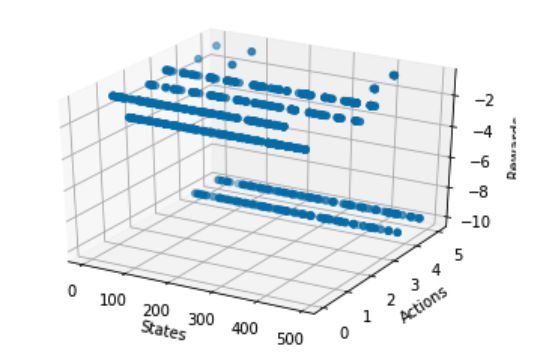
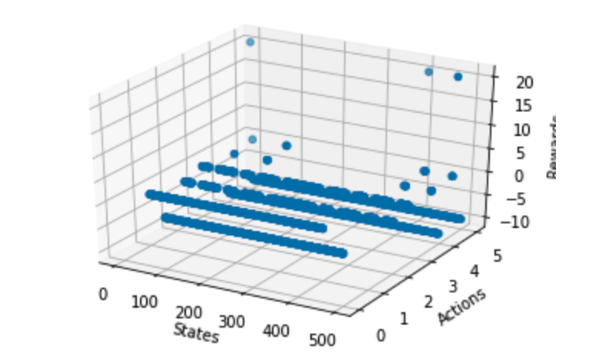

The first graph was captured at about 1000 episodes while the second graph was captures at about 8000 episodes. We see that very infrequently there are cases when the rewards exceed around 15. The rewards are most frequently around -10 and around -2. Additionally we see that most rewards are happening in and around the earlier actions due to the density of the points in the first graph.

Text(246.5, 0.5, 'States')

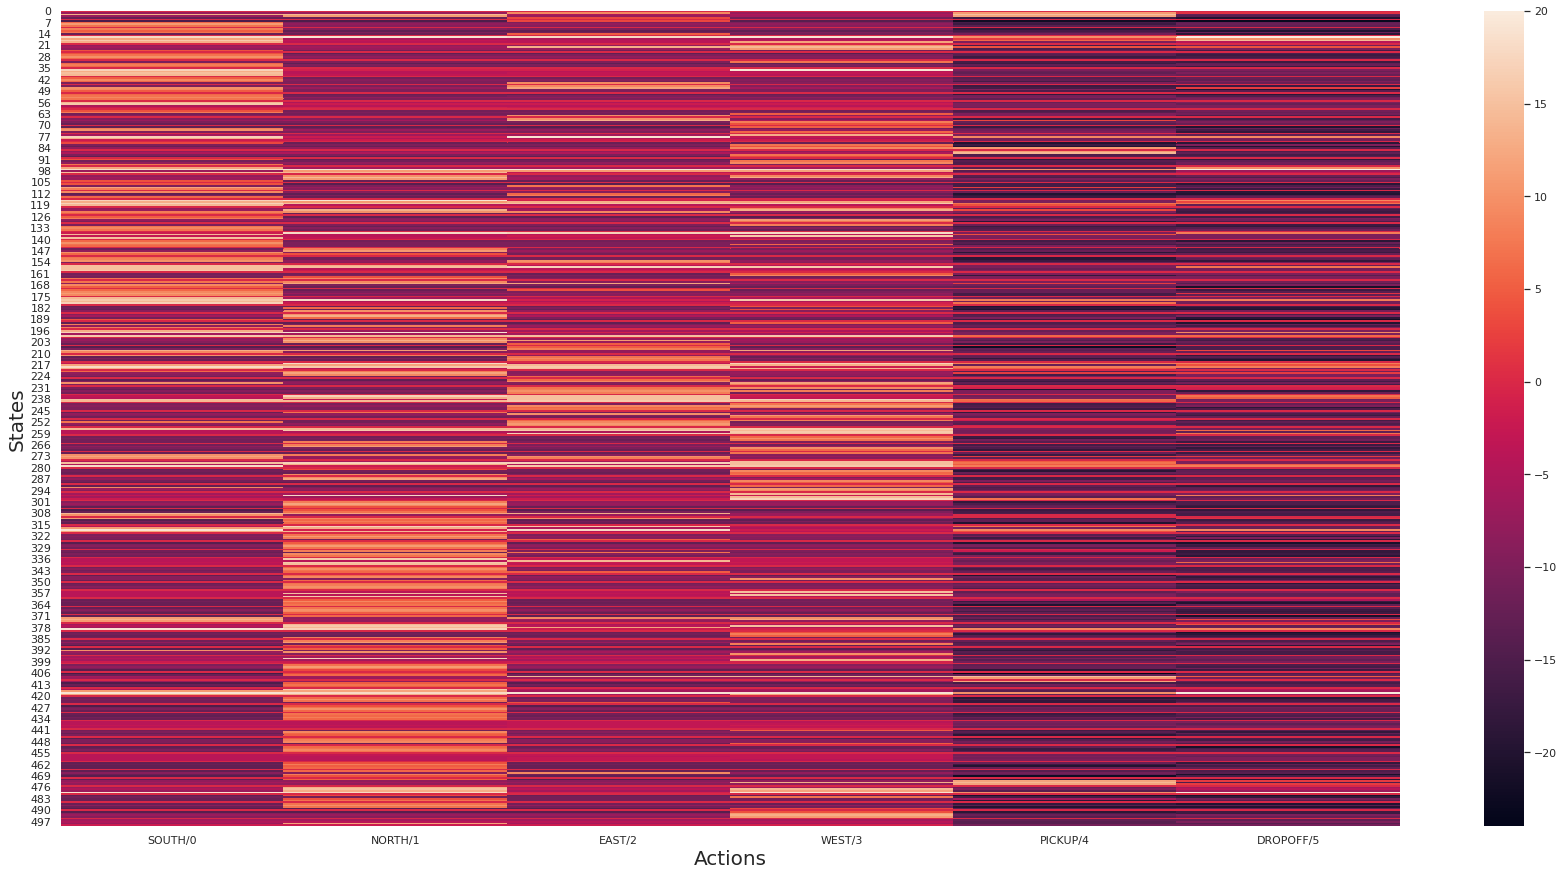

In [ ]:
sns.set_theme()
actions = ['SOUTH/0','NORTH/1','EAST/2','WEST/3','PICKUP/4','DROPOFF/5']
sns.set(rc = {'figure.figsize':(30,15)})
ax = sns.heatmap(taxi_problem.qtable,xticklabels= actions)
ax.set_xlabel("Actions", fontsize = 20)
ax.set_ylabel("States", fontsize = 20)





The above heatmap displays similar results of the 3D graph, but in an easier to read format. We're able to see in the light areas of the lower action numbers that there are higher rewards. This would make sense because 0, 1, 2, and 3 are the 4 actions that denote to the cardinal directions, but it is interesting to see that the drop off action which is +20 is not higher.

Below we are able to show what a sample episode looks like in the environment with the calculator of steps

In [ ]:
taxi_problem.show_steps()

STEP 1
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
SCORE -1
STEP 2
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
SCORE -2
STEP 3
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
SCORE -3
STEP 4
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
SCORE -4
STEP 5
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
SCORE -5
STEP 6
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
SCORE -6
STEP 7
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
SCORE -7
STEP 8
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
SCORE -8
STEP 9
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
SCORE -9
STEP 10
+----

### Challenges & Extension of Project 
Throughout this project, we faced a few challenges. One of the biggest problems was that we wanted to use a maximum number of episodes, but the Jupyter Notebook engine would often times out on us leading to incomplete results. As a result, we opted to print the State x Action x Reward graph during each episode to ensure that even if the engine crashed, we would still be able to output some sort of a result. This graph was important to our understanding of the problem because it showed how often each total reward was given. If given more time to work on this project, we would like to create our own environment with more specified rewards. For example, rewarding -1 for each step, but then also rewarding -5 for steps in the wrong direction. With a grid that’s larger than 5 x 5 we would be able to better give more specific rewards. In addition to this, if given an extension to this project we would be interested in applying the actor critic algorithm to our taxi problem. Using a value and policy based algorithm would be an intriguing contrast to the policy based algorithms we used and we wonder if it would help reduce the number of steps and further maximize the reward. 
